<a href="https://colab.research.google.com/github/Dollyp1205/Marketing-Research-Methods---Dolly-Poddar--Jio-Institute/blob/Exam/Question_3_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preview:


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210413152844,2021-04-15,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,10.0,10.0,10.0,NaN,f,1.0,0.0,1.0,0.0,0.58
1,21853,https://www.airbnb.com/rooms/21853,20210413152844,2021-04-16,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,10.0,8.0,9.0,NaN,f,2.0,0.0,2.0,0.0,0.42
2,23001,https://www.airbnb.com/rooms/23001,20210413152844,2021-04-16,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,7.0,6.0,1.0,0.0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210413152844,2021-04-15,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,10.0,10.0,10.0,NaN,t,1.0,1.0,0.0,0.0,0.13
4,26825,https://www.airbnb.com/rooms/26825,20210413152844,2021-04-15,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,9.0,9.0,9.0,NaN,f,1.0,0.0,1.0,0.0,1.12


Multi-listing indicator counts (0: Single listing, 1: Multiple listings):


,count
is_multi_listing,
0,5152
1,5692


<ipython-input-1-1129c5728ef4>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_multi_listing', data=data, palette='viridis')


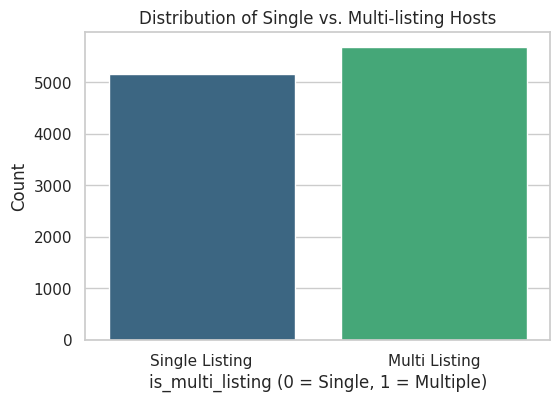

Dataset for Modeling:


,host_id,reviews_per_month,review_scores_communication,review_scores_location,review_scores_value,instant_bookable_numeric,is_multi_listing
0,13660,0.58,10.0,10.0,10.0,0.0,0
1,83531,0.42,10.0,8.0,9.0,0.0,1
3,346366726,0.13,10.0,10.0,10.0,1.0,0
4,114340,1.12,9.0,9.0,9.0,0.0,0
5,82175,0.03,10.0,8.0,9.0,0.0,1


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1206
           1       0.65      0.68      0.66      1560

    accuracy                           0.61      2766
   macro avg       0.60      0.60      0.60      2766
weighted avg       0.61      0.61      0.61      2766



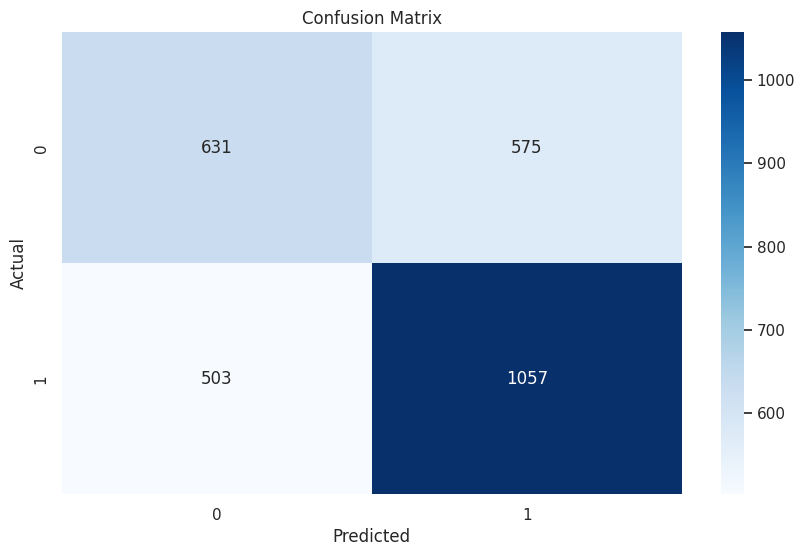

Logistic Regression Coefficients:


,Feature,Coefficient
0,reviews_per_month,0.137679
1,review_scores_communication,-0.280209
2,review_scores_location,0.247369
3,review_scores_value,-0.217814
4,instant_bookable_numeric,0.735234



Insights:
- The new column 'is_multi_listing' indicates whether a host has more than one listing (1) or only one (0).
- The countplot shows how many listings come from multi-listing hosts versus single-listing hosts.
- The logistic regression model is built to predict whether a listing is from a multi-listing host based on features like reviews per month, review scores, and whether the listing is instant bookable.
- The model coefficients give an idea of which features are associated with multi-listing behavior.
- Note: In a real-world scenario, you might use additional features (such as property location, price, etc.) and a larger dataset to more accurately assess speculation trends among hosts.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ---------------------------------------------------
# Step 1: Load the Data
# ---------------------------------------------------
try:
    data = pd.read_csv('/content/listings_detailed.csv')
except FileNotFoundError:
    # In case the file is not found, generate a small sample dataset.
    print("File not found. Generating sample data for demonstration.")
    sample_data = {
        'id': [6369, 21853, 23001, 24805, 26825],
        'host_id': [13660, 83531, 82175, 346366726, 114340],
        'calculated_host_listings_count': [1, 2, 7, 1, 1],
        'reviews_per_month': [0.58, 0.42, np.nan, 0.13, 1.12],
        'review_scores_communication': [10.0, 10.0, np.nan, 10.0, 9.0],
        'review_scores_location': [10.0, 8.0, np.nan, 10.0, 9.0],
        'review_scores_value': [10.0, 9.0, np.nan, 10.0, 9.0],
        'instant_bookable': ['f', 'f', 'f', 't', 'f']
    }
    data = pd.DataFrame(sample_data)

# Preview the data
print("Data Preview:")
display(data.head())

# ---------------------------------------------------
# Step 2: Create Target Variable: is_multi_listing
# ---------------------------------------------------
# Convert the calculated_host_listings_count to numeric (if not already)
data['calculated_host_listings_count'] = pd.to_numeric(data['calculated_host_listings_count'], errors='coerce')

# Define a new column: 1 if the host has more than 1 listing (i.e. multi-listing), else 0.
data['is_multi_listing'] = (data['calculated_host_listings_count'] > 1).astype(int)

# Display counts
multi_listing_counts = data['is_multi_listing'].value_counts().sort_index()
print("Multi-listing indicator counts (0: Single listing, 1: Multiple listings):")
display(multi_listing_counts)

# Visualize the distribution of multi-listing vs single-listing hosts
plt.figure(figsize=(6,4))
sns.countplot(x='is_multi_listing', data=data, palette='viridis')
plt.title('Distribution of Single vs. Multi-listing Hosts')
plt.xlabel('is_multi_listing (0 = Single, 1 = Multiple)')
plt.ylabel('Count')
plt.xticks([0,1], ['Single Listing', 'Multi Listing'])
plt.show()

# ---------------------------------------------------
# Step 3: Prepare Data for Logistic Regression
# ---------------------------------------------------
# We'll use a few features that might be related to being a multi-listing host.
# For this example, we use:
#  - reviews_per_month
#  - review_scores_communication
#  - review_scores_location
#  - review_scores_value
#  - instant_bookable (converted to binary: 1 if 't', 0 if 'f')

# Convert instant_bookable to numeric
data['instant_bookable_numeric'] = data['instant_bookable'].map({'t': 1, 'f': 0})

# Select features and target.
features = ['reviews_per_month',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value',
            'instant_bookable_numeric']

# Remove rows with missing values in the selected features and target.
model_data = data.dropna(subset=features + ['is_multi_listing']).copy()

# Define X (features) and y (target)
X = model_data[features]
y = model_data['is_multi_listing']

# Display the dataset used for modeling
print("Dataset for Modeling:")
display(model_data[['host_id'] + features + ['is_multi_listing']].head())

# ---------------------------------------------------
# Step 4: Train/Test Split and Logistic Regression Model
# ---------------------------------------------------
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# ---------------------------------------------------
# Step 5: Evaluate the Model
# ---------------------------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ---------------------------------------------------
# Step 6: Inspect Model Coefficients
# ---------------------------------------------------
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_reg.coef_[0]
})
print("Logistic Regression Coefficients:")
display(coefficients)

# ---------------------------------------------------
# Step 7: Insights & Explanation
# ---------------------------------------------------
print("\nInsights:")
print("- The new column 'is_multi_listing' indicates whether a host has more than one listing (1) or only one (0).")
print("- The countplot shows how many listings come from multi-listing hosts versus single-listing hosts.")
print("- The logistic regression model is built to predict whether a listing is from a multi-listing host based on features like reviews per month, review scores, and whether the listing is instant bookable.")
print("- The model coefficients give an idea of which features are associated with multi-listing behavior.")
print("- Note: In a real-world scenario, you might use additional features (such as property location, price, etc.) and a larger dataset to more accurately assess speculation trends among hosts.")
